In [2]:
from google.colab import files
uploaded = files.upload()


Saving Wholesale customers data.csv to Wholesale customers data.csv


Uploading Dataset

In [3]:
import pandas as pd
file_path = "/content/Wholesale customers data.csv"


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(file_path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Exploratory Data Analysis

1.Shape

In [6]:
df.shape

(440, 8)

2.Check column names, datatypes, missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


3.Summary statistics

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4.Missing values

In [9]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


5. Duplicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

6. Value Count

In [11]:
df.Region.value_counts()

,count
Region,
3,316
1,77
2,47


In [12]:
df.Channel.value_counts()

,count
Channel,
1,298
2,142


7. Droping Categorical Feature

In [13]:
df_clean = df.drop(['Channel', 'Region'], axis=1,inplace=True)

8. Histogram --> Features distribution

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

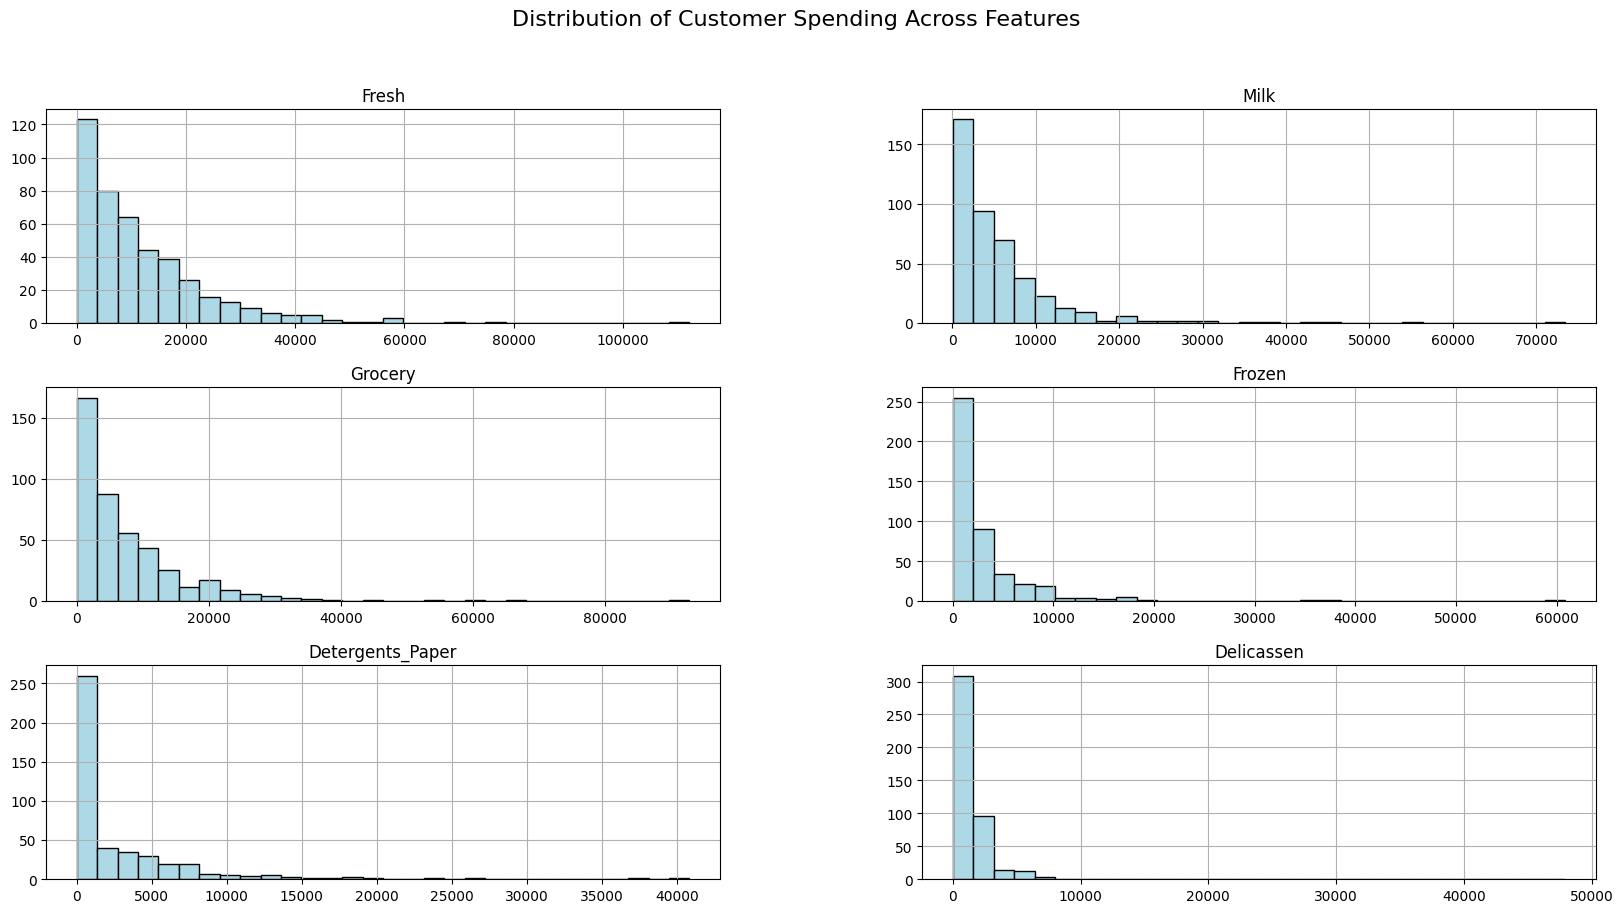

In [15]:
# Plot histograms for all numerical features
df.hist(figsize=(20,10), bins=30, color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Customer Spending Across Features', fontsize=16)
plt.show()



9. Correlation Analysis

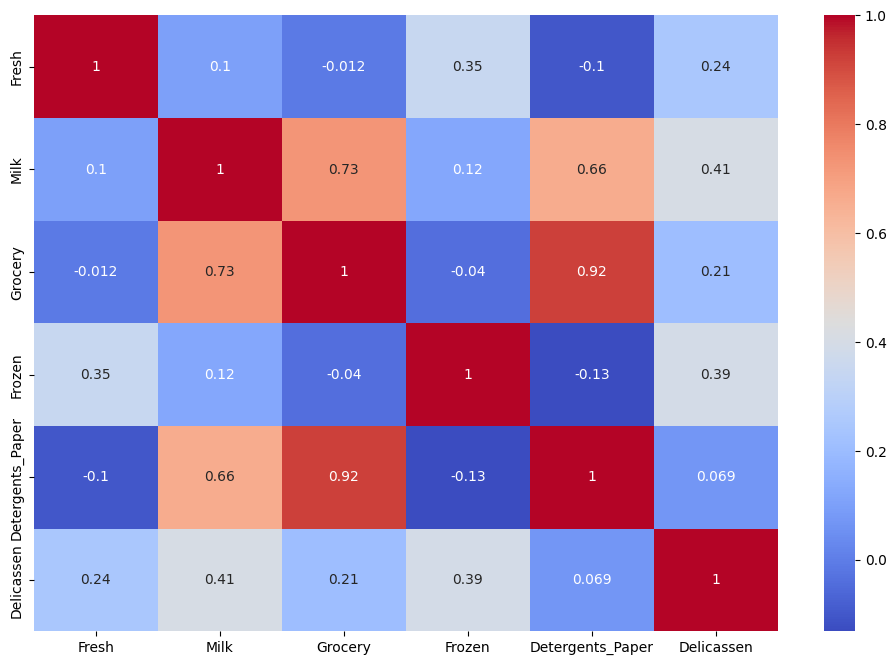

In [16]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


10. Boxplots --> Outlier Detection

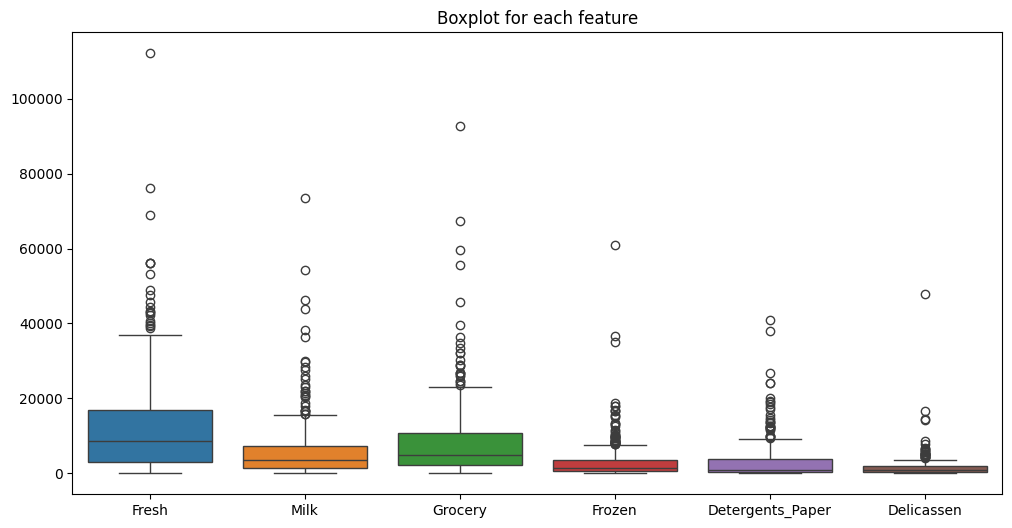

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title('Boxplot for each feature')
plt.show()


# Preprocessing

1. Handle skewed data using log transformation

In [18]:
skewed_features = df.apply(lambda x: np.log1p(x) if x.skew() > 0.5 else x)

2. Feature Scaling

In [21]:

# Standard Scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(skewed_features)
scaler_Standard_df = pd.DataFrame(scaled_std, columns=skewed_features.columns)
scaler_Standard_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.486184,0.976299,0.440155,-1.509250,0.644143,0.408966
1,0.087889,0.990956,0.652171,0.134052,0.766043,0.627926
2,0.016356,0.891151,0.454687,0.376899,0.804405,1.776833
3,0.517477,-0.957973,-0.084792,1.141574,-0.328712,0.633133
4,0.880631,0.439662,0.395847,0.757322,0.404939,1.456588


3. Min Max Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(skewed_features)
scaled_df = pd.DataFrame(scaled_features, columns=skewed_features.columns)
scaled_df.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.787076,0.717315,0.750579,0.272291,0.704748,0.619005
1,0.729947,0.719518,0.773997,0.543498,0.727298,0.649139
2,0.719687,0.704513,0.752184,0.583577,0.734394,0.807256
3,0.791565,0.426513,0.692596,0.709778,0.524784,0.649856
4,0.843653,0.636636,0.745685,0.646361,0.660499,0.763182


4. Kernel Density Estimate Plot for Standard Scaled Data

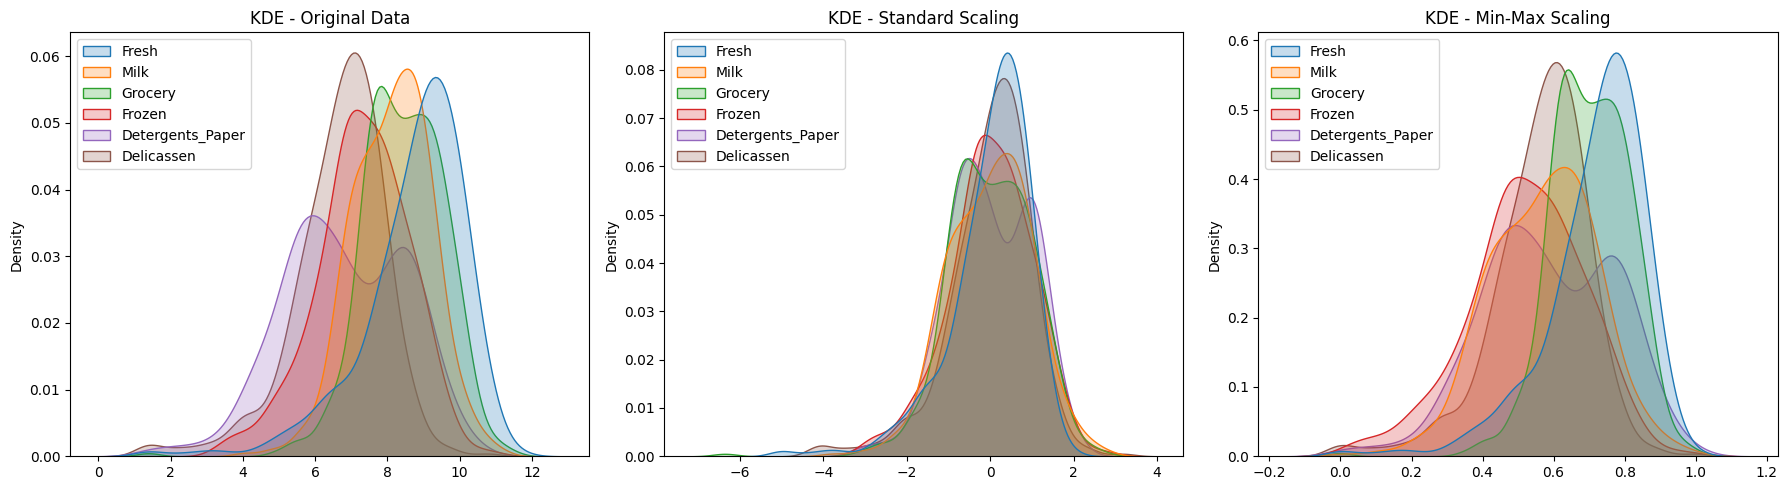

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaling
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(skewed_features)
scaler_Standard_df = pd.DataFrame(scaled_std, columns=skewed_features.columns)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(skewed_features)
scaler_MinMax_df = pd.DataFrame(scaled_minmax, columns=skewed_features.columns)

# Plot KDEs
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data=skewed_features, fill=True, ax=axes[0])
axes[0].set_title("KDE - Original Data")

sns.kdeplot(data=scaler_Standard_df, fill=True, ax=axes[1])
axes[1].set_title("KDE - Standard Scaling")

sns.kdeplot(data=scaler_MinMax_df, fill=True, ax=axes[2])
axes[2].set_title("KDE - Min-Max Scaling")

plt.tight_layout()
plt.show()


## I will use MinMaxScaler as it scales features to a specific range, preserves feature relationships, and brings all values to a common scale.

# Model Training

###1. Elbow method for KMeans Clustering

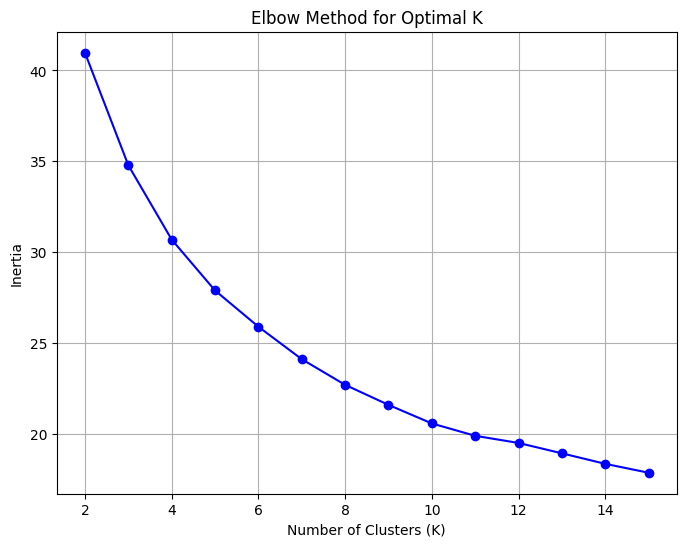

The optimal number of clusters (K) is: 3


In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use scaled data for KMeans
X = scaled_df

# Define the range of K values to test
K_values = range(2, 16)
inertia = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Use scaled features
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Identify optimal K using minimum difference
diff = np.diff(inertia)
k_optimal = K_values[np.argmin(diff) + 1]

print(f"The optimal number of clusters (K) is: {k_optimal}")



### 2. Applying KMeans with K=3

In [27]:
from sklearn.cluster import KMeans

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)
df.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2


Calculate mean spending per cluster

In [28]:

cluster_profile = df.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profile)


Cluster Profiles:
                 Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0         3603.059524   6691.666667  12442.321429   530.214286   
1        12592.662100   2136.662100   2707.228311  3341.552511   
2        16202.051095  11097.284672  13580.467153  4199.357664   

         Detergents_Paper   Delicassen  
Cluster                                 
0             5415.654762   869.226190  
1              400.397260   971.022831  
2             5293.832117  2812.218978  


### 3. PCA

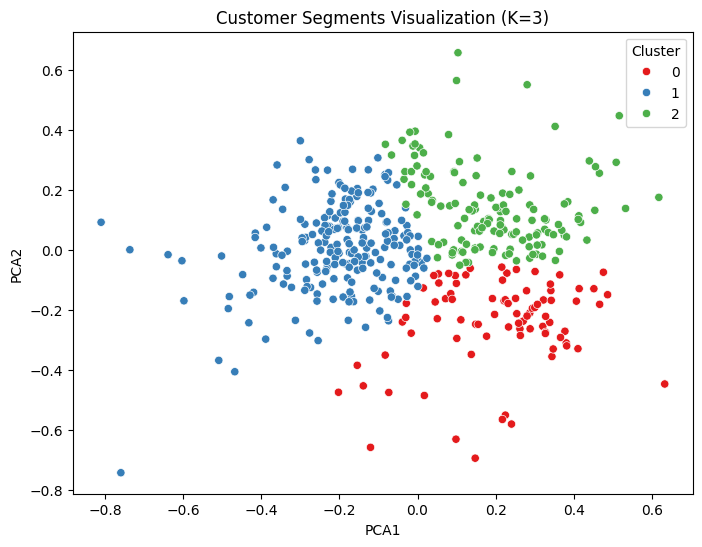

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Visualization (K=3)')
plt.show()


Silhouette_score

In [30]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_df, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.260


Davies-Bouldin Index

In [31]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score:.3f}")


Davies-Bouldin Index: 1.335


Calinski-Harabasz Index

In [32]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")


Calinski-Harabasz Index: 156.808


## Compare KMeans with Different K Values

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

scores = []

for k in range(2, 10):  # test K from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)

    sil = silhouette_score(scaled_df, labels)
    db = davies_bouldin_score(scaled_df, labels)
    ch = calinski_harabasz_score(scaled_df, labels)

    scores.append((k, sil, db, ch))

# Display results
import pandas as pd
results_df = pd.DataFrame(scores, columns=["K", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print(results_df)


   K  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  2    0.300345        1.308850         200.526840
1  3    0.260366        1.335041         156.808439
2  4    0.199307        1.542516         137.603029
3  5    0.202368        1.488120         124.258437
4  6    0.199328        1.456198         113.517815
5  7    0.199729        1.439742         106.746766
6  8    0.196558        1.401443         100.805691
7  9    0.195910        1.414397          95.266495


## K=2 clusters is better.

###4. Agglomerative Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)  # try with 3 clusters first
labels_agg = agg.fit_predict(scaled_df)

print("Agglomerative Clustering")
print("Silhouette:", silhouette_score(scaled_df, labels_agg))
print("Davies-Bouldin:", davies_bouldin_score(scaled_df, labels_agg))
print("Calinski-Harabasz:", calinski_harabasz_score(scaled_df, labels_agg))


Agglomerative Clustering
Silhouette: 0.2088492591837894
Davies-Bouldin: 1.5288960130132931
Calinski-Harabasz: 136.27859294926918


### 5. DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)  # tune eps & min_samples
labels_dbscan = dbscan.fit_predict(scaled_df)

# Only evaluate if DBSCAN finds more than 1 cluster
if len(set(labels_dbscan)) > 1:
    print("DBSCAN")
    print("Silhouette:", silhouette_score(scaled_df, labels_dbscan))
    print("Davies-Bouldin:", davies_bouldin_score(scaled_df, labels_dbscan))
    print("Calinski-Harabasz:", calinski_harabasz_score(scaled_df, labels_dbscan))
else:
    print("DBSCAN found only 1 cluster (adjust eps/min_samples).")


DBSCAN found only 1 cluster (adjust eps/min_samples).


### 6. Gaussian Mixture Model (GMM)

In [36]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(scaled_df)

print("Gaussian Mixture Model")
print("Silhouette:", silhouette_score(scaled_df, labels_gmm))
print("Davies-Bouldin:", davies_bouldin_score(scaled_df, labels_gmm))
print("Calinski-Harabasz:", calinski_harabasz_score(scaled_df, labels_gmm))


Gaussian Mixture Model
Silhouette: 0.16630834367415437
Davies-Bouldin: 1.622133537037696
Calinski-Harabasz: 109.09041498261635


# Compare All Models

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

results = []

# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=42).fit(scaled_df)
labels_kmeans = kmeans.labels_
results.append([
    "KMeans",
    silhouette_score(scaled_df, labels_kmeans),
    davies_bouldin_score(scaled_df, labels_kmeans),
    calinski_harabasz_score(scaled_df, labels_kmeans)
])

# --- Agglomerative Clustering ---
agg = AgglomerativeClustering(n_clusters=2).fit(scaled_df)
labels_agg = agg.labels_
results.append([
    "Agglomerative",
    silhouette_score(scaled_df, labels_agg),
    davies_bouldin_score(scaled_df, labels_agg),
    calinski_harabasz_score(scaled_df, labels_agg)
])

# --- Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=2, random_state=42).fit(scaled_df)
labels_gmm = gmm.predict(scaled_df)
results.append([
    "GMM",
    silhouette_score(scaled_df, labels_gmm),
    davies_bouldin_score(scaled_df, labels_gmm),
    calinski_harabasz_score(scaled_df, labels_gmm)
])

# --- DBSCAN ---
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(scaled_df)
labels_dbscan = dbscan.labels_

# Only compute metrics if DBSCAN forms valid clusters
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    results.append([
        "DBSCAN",
        silhouette_score(scaled_df, labels_dbscan),
        davies_bouldin_score(scaled_df, labels_dbscan),
        calinski_harabasz_score(scaled_df, labels_dbscan)
    ])
else:
    results.append(["DBSCAN", None, None, None])

# Put results into DataFrame
comparison_df = pd.DataFrame(results, columns=["Model", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print(comparison_df)


           Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
0         KMeans    0.300345        1.308850         200.526840
1  Agglomerative    0.240850        1.453760         157.825586
2            GMM    0.282273        1.325927         183.662169
3         DBSCAN         NaN             NaN                NaN


Scatter plot For clustering algorithm

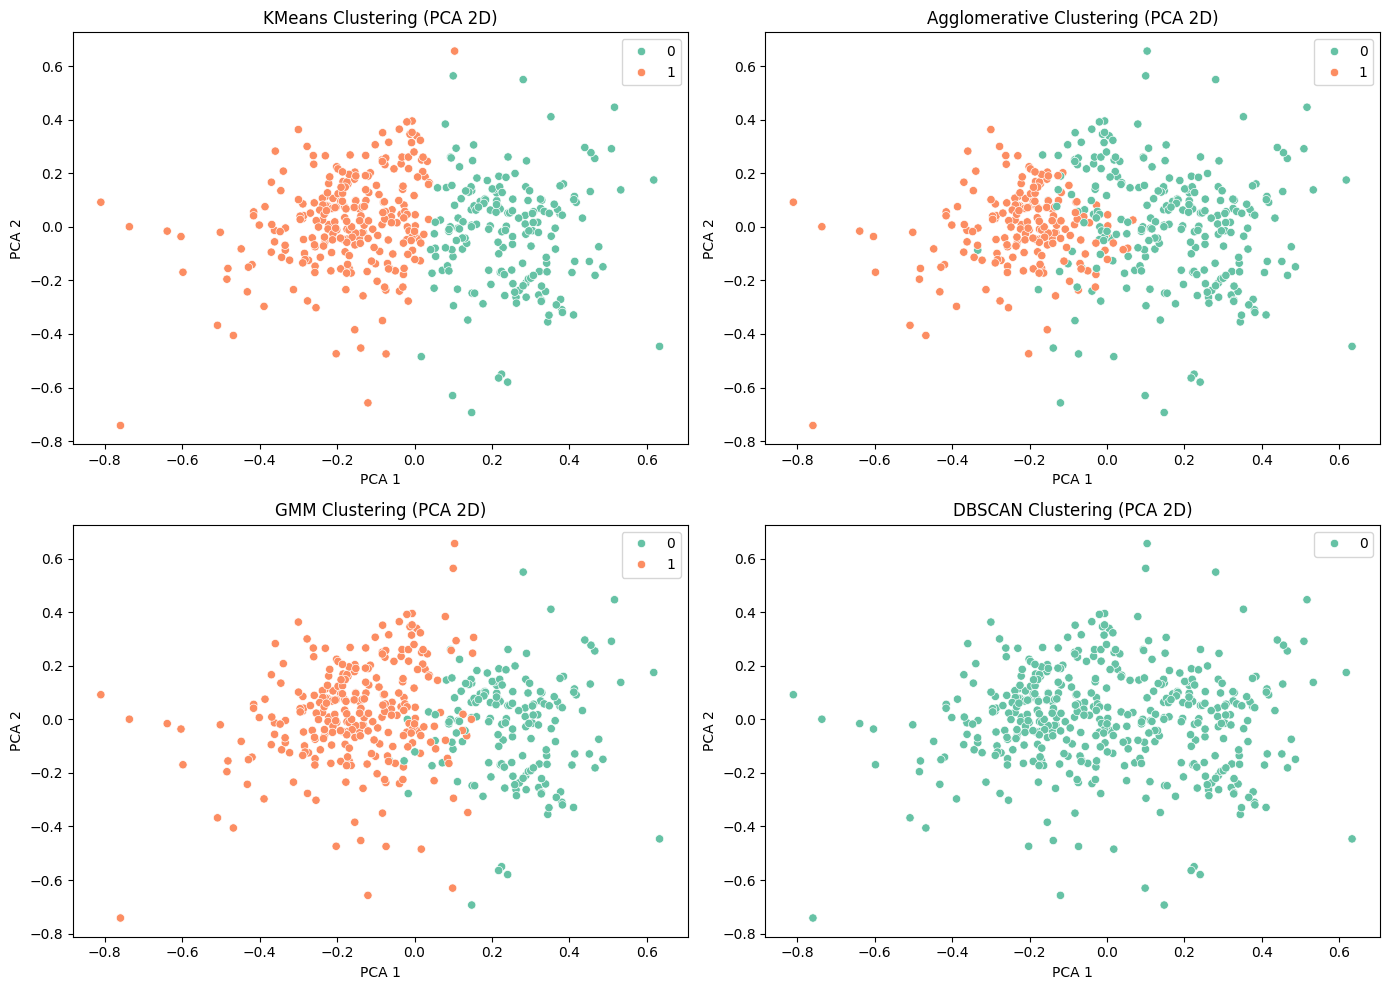

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

# Re-run clustering with best params
kmeans = KMeans(n_clusters=2, random_state=42).fit(scaled_df)
agg = AgglomerativeClustering(n_clusters=2).fit(scaled_df)
gmm = GaussianMixture(n_components=2, random_state=42).fit(scaled_df)
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(scaled_df)

# Collect labels
labels_dict = {
    "KMeans": kmeans.labels_,
    "Agglomerative": agg.labels_,
    "GMM": gmm.predict(scaled_df),
    "DBSCAN": dbscan.labels_
}

# Plot all in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, labels) in enumerate(labels_dict.items()):
    sns.scatterplot(
        x=X_pca[:,0], y=X_pca[:,1], hue=labels,
        palette="Set2", ax=axes[i], legend="full"
    )
    axes[i].set_title(f"{name} Clustering (PCA 2D)")
    axes[i].set_xlabel("PCA 1")
    axes[i].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


Total spending per customer

In [40]:
# 1️. Add cluster labels to the original DataFrame
df_with_clusters = df.copy()  # start with original dataset
df_with_clusters['Cluster'] = kmeans.labels_

# 2️. Now you can run business analysis
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Add total spending per customer
df_with_clusters['Total_Spending'] = df_with_clusters[spending_cols].sum(axis=1)


In [42]:
df_with_clusters.head(10)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,PCA1,PCA2,Total_Spending
0,12669,9656,7561,214,2674,1338,0,0.228732,-0.077381,34112
1,7057,9810,9568,1762,3293,1776,0,0.212276,0.097680,33266
2,6353,8808,7684,2405,3516,7844,0,0.217829,0.188815,36610
3,13265,1196,4221,6404,507,1788,1,-0.155115,0.178031,27381
4,22615,5410,7198,3915,1777,5185,0,0.093180,0.260302,46100
5,9413,8259,5126,666,1795,1451,0,0.147310,0.006110,26710
6,12126,3199,6975,480,3140,545,0,0.123677,-0.083175,26465
7,7579,4956,9426,1669,3321,2566,0,0.169668,0.094787,29517
8,5963,3648,6192,425,1716,750,0,0.099410,-0.111514,18694
9,6006,11093,18881,1159,7425,2098,0,0.325591,0.068474,46662


 # BUSINESS SEGMENT ANALYSIS


In [46]:

# 1️. Cluster Profiling
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Add total spending per customer
df_with_clusters['Total_Spending'] = df_with_clusters[spending_cols].sum(axis=1)

# Cluster-level summary
cluster_profile = df_with_clusters.groupby('Cluster')[spending_cols + ['Total_Spending']].agg(
    ['mean', 'median', 'std', 'sum']
).round(0)
print("Cluster Profile Summary:\n", cluster_profile)

# Cluster sizes and revenue contribution
cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_sizes / len(df_with_clusters) * 100).round(1)
revenue_by_cluster = df_with_clusters.groupby('Cluster')['Total_Spending'].sum()
revenue_percentage = (revenue_by_cluster / df_with_clusters['Total_Spending'].sum() * 100).round(1)

print("\nCluster Sizes:\n", cluster_sizes)
print("\nCluster Percentages:\n", cluster_percentages)
print("\nRevenue Contribution (%):\n", revenue_percentage)





Cluster Profile Summary:
            Fresh                                Milk                           \
            mean   median      std      sum     mean  median     std      sum   
Cluster                                                                         
0         9150.0   5531.0  11854.0  1674437  10147.0  7639.0  9072.0  1856931   
1        14030.0  10405.0  12824.0  3605694   2698.0  1891.0  3425.0   693426   

         Grocery           ... Detergents_Paper          Delicassen          \
            mean   median  ...              std      sum       mean  median   
Cluster                    ...                                                
0        14699.0  11522.0  ...           5896.0  1145841     1889.0  1340.0   
1         3146.0   2464.0  ...            533.0   122016     1266.0   778.0   

                        Total_Spending                             
            std     sum           mean   median      std      sum  
Cluster                             

In [47]:
# 2. Business Insights per Cluster
business_insights = {}
for cluster_id in sorted(df_with_clusters['Cluster'].unique()):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]

    avg_spending = cluster_data[spending_cols].mean()
    dominant_categories = avg_spending.nlargest(3).index.tolist()
    weak_categories = avg_spending.nsmallest(2).index.tolist()

    avg_total_spending = cluster_data['Total_Spending'].mean()
    if avg_total_spending > df_with_clusters['Total_Spending'].quantile(0.75):
        value_tier = "High Value"
        priority = "High Priority"
    elif avg_total_spending > df_with_clusters['Total_Spending'].quantile(0.25):
        value_tier = "Medium Value"
        priority = "Medium Priority"
    else:
        value_tier = "Low Value"
        priority = "Standard Priority"

    business_insights[f"Segment_{cluster_id}"] = {
        'size': len(cluster_data),
        'percentage': f"{len(cluster_data)/len(df_with_clusters)*100:.1f}%",
        'avg_total_spending': round(avg_total_spending, 0),
        'value_tier': value_tier,
        'priority': priority,
        'dominant_categories': dominant_categories,
        'weak_categories': weak_categories
    }


In [48]:
# 3️. Display Insights
for segment, info in business_insights.items():
    print(f"\n{segment} - {info['priority']}")
    print("-"*40)
    print(f"Size: {info['size']} customers ({info['percentage']})")
    print(f"Avg Total Spending: {info['avg_total_spending']}")
    print(f"Value Tier: {info['value_tier']}")
    print(f"Top Categories: {', '.join(info['dominant_categories'])}")
    print(f"Growth Opportunities: {', '.join(info['weak_categories'])}")


Segment_0 - High Priority
----------------------------------------
Size: 183 customers (41.6%)
Avg Total Spending: 44079.0
Value Tier: High Value
Top Categories: Grocery, Milk, Fresh
Growth Opportunities: Delicassen, Frozen

Segment_1 - Medium Priority
----------------------------------------
Size: 257 customers (58.4%)
Avg Total Spending: 25498.0
Value Tier: Medium Value
Top Categories: Fresh, Frozen, Grocery
Growth Opportunities: Detergents_Paper, Delicassen


## Segment-Specific Marketing Recommendations

In [49]:
import pandas as pd
import numpy as np

# Add cluster labels to the original (scaled) data
df_with_clusters = scaled_df.copy()
df_with_clusters['Cluster'] = kmeans.labels_

# Calculate total spending per customer
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_with_clusters['Total_Spending'] = df_with_clusters[spending_cols].sum(axis=1)

# Business segment profiling
segment_profiles = df_with_clusters.groupby('Cluster').agg({
    'Fresh': ['mean', 'median', 'sum'],
    'Milk': ['mean', 'median', 'sum'],
    'Grocery': ['mean', 'median', 'sum'],
    'Frozen': ['mean', 'median', 'sum'],
    'Detergents_Paper': ['mean', 'median', 'sum'],
    'Delicassen': ['mean', 'median', 'sum'],
    'Total_Spending': ['mean', 'median', 'sum']
}).round(0)

print("=== Business Segment Profiles ===")
print(segment_profiles)

# Generate marketing & engagement recommendations per segment
recommendations = {}
total_spending_quartiles = df_with_clusters['Total_Spending'].quantile([0.25, 0.75])

for cluster_id in sorted(df_with_clusters['Cluster'].unique()):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
    avg_spending = cluster_data[spending_cols].mean()

    # Determine top and weak categories
    dominant_categories = avg_spending.nlargest(2).index.tolist()
    weak_categories = avg_spending.nsmallest(2).index.tolist()

    # Determine customer value tier
    avg_total_spending = cluster_data['Total_Spending'].mean()
    if avg_total_spending > total_spending_quartiles[0.75]:
        value_tier = "High Value"
        campaign = ["VIP program", "Premium product offers", "Exclusive early access"]
    elif avg_total_spending > total_spending_quartiles[0.25]:
        value_tier = "Medium Value"
        campaign = ["Cross-sell weak categories", "Loyalty program benefits", "Targeted discounts"]
    else:
        value_tier = "Low Value"
        campaign = ["Educational content", "Entry-level promotions", "Welcome offers"]

    recommendations[f"Segment_{cluster_id}"] = {
        "Customer Count": len(cluster_data),
        "Value Tier": value_tier,
        "Top Categories": dominant_categories,
        "Weak Categories": weak_categories,
        "Recommended Campaigns": campaign
    }

print("\n=== Segment-Specific Marketing Recommendations ===")
for segment, recs in recommendations.items():
    print(f"\n{segment}:")
    for key, val in recs.items():
        print(f" - {key}: {val}")


=== Business Segment Profiles ===
        Fresh               Milk               Grocery               Frozen  \
         mean median    sum mean median    sum    mean median    sum   mean   
Cluster                                                                       
0         1.0    1.0  123.0  1.0    1.0  126.0     1.0    1.0  146.0    0.0   
1         1.0    1.0  192.0  0.0    0.0  125.0     1.0    1.0  163.0    1.0   

         ...        Detergents_Paper               Delicassen                \
         ...    sum             mean median    sum       mean median    sum   
Cluster  ...                                                                  
0        ...   84.0              1.0    1.0  139.0        1.0    1.0  107.0   
1        ...  146.0              0.0    0.0  119.0        1.0    1.0  141.0   

        Total_Spending                
                  mean median    sum  
Cluster                               
0                  4.0    4.0  725.0  
1                 

In [50]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import joblib
from google.colab import files


k_optimal = 2

# Initialize scaler and KMeans
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(skewed_features)  # skewed_features from EDA after log transform

kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_model.fit(scaled_features)

# Save the model and scaler
joblib.dump(kmeans_model, "kmeans_model.pkl")
joblib.dump(scaler, "minmax_scaler.pkl")

# Download to local machine (optional)
files.download("kmeans_model.pkl")
files.download("minmax_scaler.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predict New Customer Cluster

In [51]:
# -------------------------------
# 2️⃣
# -------------------------------
def predict_new_customer_cluster(new_customer_dict, model_path="kmeans_model.pkl", scaler_path="minmax_scaler.pkl"):
    """
    Predict cluster for a new customer
    new_customer_dict: dict with keys matching numeric features ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
    """
    # Load model and scaler
    kmeans = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # Convert input to DataFrame
    customer_df = pd.DataFrame([new_customer_dict])

    # Handle skewed features (log transform if skew > 0.5)
    for col in customer_df.columns:
        if customer_df[col].skew() > 0.5:
            customer_df[col] = np.log1p(customer_df[col])

    # Scale features
    customer_scaled = scaler.transform(customer_df)

    # Predict cluster
    cluster_label = kmeans.predict(customer_scaled)
    return cluster_label[0]

# Example

In [52]:
new_customer = {
    'Fresh': 1200,
    'Milk': 600,
    'Grocery': 400,
    'Frozen': 300,
    'Detergents_Paper': 200,
    'Delicassen': 100
}

predicted_cluster = predict_new_customer_cluster(new_customer)
print(f"Predicted Cluster for New Customer: {predicted_cluster}")

Predicted Cluster for New Customer: 0
